#### Apriori Association

##### Definitions

* **Itemset**: Set of transaction attributes = {A, B, C, D, E}
* **Support Count**: Frequent of Item(s) in the dataset
* **Support**: Support Count / count(all transactions) * 100
* **Minimum Support**: Experimental value that we set to eliminate low supported transactions
* **Frequent Itemset**: Frequent of Itemsets in the dataset
* **Association Rule**: Antecedents and Consequents Duology = {A, C} => {B}

        (Itemset {B} appears in transactions that have Itemset {A, C})  
* **Association Rule Support**: Support Count ({A, C, B}) / count(all)
* **Association Rule Confidence**: Support Count ({A, C, B}) / Support Count({A, C})
* **Confidence Min-Threshold** = Experimental value that we set to eliminate low confidence association rules

##### How it works

* Generate Frequent Itemsets that have support greater than or equal min_support (Max without elimination = 2**N - 1)
* Generate association rules that have confidence above the min_threshold (Max without elimination = 2**N - 2)

##### Example with Itemset {A,B,C,D}

* First level of association rules

        {B,C,D} => {A}, {A,C,D} => {B}, {A,B,D} => {C}, {A,B,C} => {D}  
* For {B,C,D} => {A} we calculate Confidence(A => B,C,D)
* But Confidence(A => B,C,D) <= Confidence(A,B => C,D) <= Confidence(A,B,C => D)
* So, if Confidence(A => B,C,D) if below the confidence min_threshold, then all sub-association rules are useless

In [98]:
transactions = [
  ["Bread", "Milk"],
  ["Bread", "Cheese", "Juice", "Eggs"],
  ["Milk", "Cheese", "Juice", "Coke"],
  ["Bread", "Milk", "Cheese", "Juice"],
  ["Bread", "Milk", "Cheese", "Coke"],
]

In [99]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()

# True/False represents existence of the item in the transaction
encoded_transactions = encoder.fit_transform(transactions)

encoded_transactions

array([[ True, False, False, False, False,  True],
       [ True,  True, False,  True,  True, False],
       [False,  True,  True, False,  True,  True],
       [ True,  True, False, False,  True,  True],
       [ True,  True,  True, False, False,  True]])

In [100]:
import pandas as pd

data = pd.DataFrame(encoded_transactions, columns = encoder.columns_)

data.head()

,Bread,Cheese,Coke,Eggs,Juice,Milk
0,True,False,False,False,False,True
1,True,True,False,True,True,False
2,False,True,True,False,True,True
3,True,True,False,False,True,True
4,True,True,True,False,False,True


In [101]:
from mlxtend.frequent_patterns import apriori

# 0.4 is an experimental value here
frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)

frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.8,(Bread),1
1,0.8,(Cheese),1
2,0.4,(Coke),1
3,0.6,(Juice),1
4,0.8,(Milk),1
5,0.6,"(Cheese, Bread)",2
6,0.4,"(Juice, Bread)",2
7,0.6,"(Milk, Bread)",2
8,0.4,"(Cheese, Coke)",2
9,0.6,"(Juice, Cheese)",2


In [127]:
from mlxtend.frequent_patterns import association_rules

# 0.6 is an experimental value, confidence min threshold should be greater than min support
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)

rules = rules.sort_values("confidence", ascending = False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,"(Juice, Bread)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
10,(Coke),(Milk),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
24,"(Juice, Milk)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
22,(Coke),"(Cheese, Milk)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf,0.666667
21,"(Milk, Coke)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
5,(Coke),(Cheese),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
6,(Juice),(Cheese),0.6,0.8,0.6,1.000000,1.250000,0.12,inf,0.500000
20,"(Cheese, Coke)",(Milk),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
1,(Bread),(Cheese),0.8,0.8,0.6,0.750000,0.937500,-0.04,0.8,-0.250000
0,(Cheese),(Bread),0.8,0.8,0.6,0.750000,0.937500,-0.04,0.8,-0.250000


In [123]:
rules["index"] = rules.index
rules["antecedent"] = rules["antecedents"].apply(lambda x: ",".join(list(x)))
rules["consequent"] = rules["consequents"].apply(lambda x: ",".join(list(x)))

rules[["index", "antecedents", "antecedent", "consequents", "consequent", "confidence"]].sample(5)

,index,antecedents,antecedent,consequents,consequent,confidence
17,17,"(Cheese, Bread)","Cheese,Bread",(Milk),Milk,0.666667
10,10,(Coke),Coke,(Milk),Milk,1.000000
3,3,(Milk),Milk,(Bread),Bread,0.750000
21,21,"(Milk, Coke)","Milk,Coke",(Cheese),Cheese,1.000000
4,4,(Bread),Bread,(Milk),Milk,0.750000


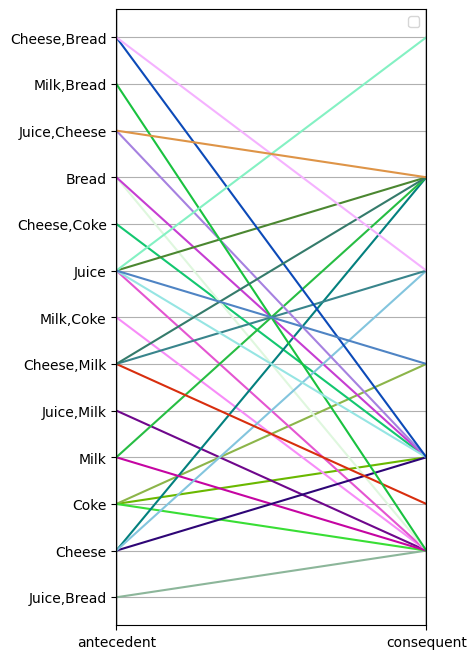

In [124]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize = (4, 8))

coords = rules[["index", "antecedent", "consequent"]]

parallel_coordinates(coords, "index")

plt.legend("")
plt.show()

In [125]:
matrix = rules.pivot(index = "antecedent", columns = "consequent", values = "confidence")

matrix

consequent,Bread,Cheese,"Cheese,Bread","Cheese,Milk",Coke,Juice,Milk
antecedent,,,,,,,
Bread,NaN,0.750000,NaN,NaN,NaN,NaN,0.750000
Cheese,0.750000,NaN,NaN,NaN,NaN,0.750000,0.750000
"Cheese,Bread",NaN,NaN,NaN,NaN,NaN,0.666667,0.666667
"Cheese,Coke",NaN,NaN,NaN,NaN,NaN,NaN,1.000000
"Cheese,Milk",0.666667,NaN,NaN,NaN,0.666667,0.666667,NaN
Coke,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
Juice,0.666667,1.000000,0.666667,0.666667,NaN,NaN,0.666667
"Juice,Bread",NaN,1.000000,NaN,NaN,NaN,NaN,NaN
"Juice,Cheese",0.666667,NaN,NaN,NaN,NaN,NaN,0.666667


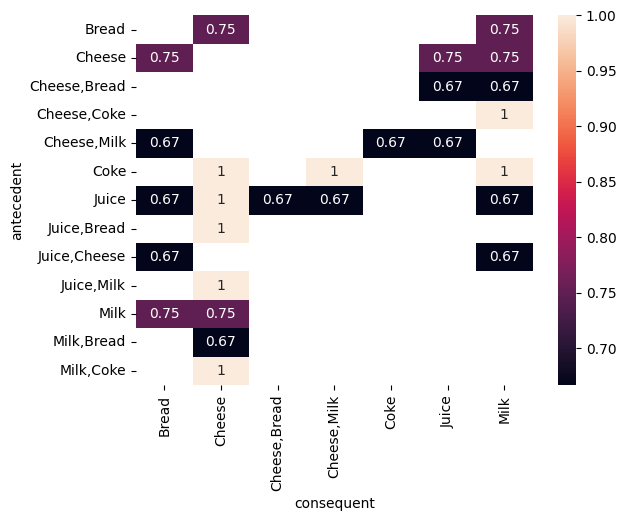

In [126]:
import seaborn as sns

sns.heatmap(matrix, annot = True)

plt.xticks(rotation = 90)

plt.show()

In [109]:
def predict(items, rules, max_results = 6):
  predicts = rules[rules["antecedents"] == items]
  predicts = predicts[["consequent", "confidence"]]
  predicts.sort_values("confidence", ascending = False)

  return predicts[:max_results]

predict({"Cheese", "Milk"}, rules)

,consequent,confidence
28,Coke,0.666667
22,Bread,0.666667
36,Juice,0.666667
